In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import matplotlib.pyplot as plt

In [14]:
tf.random.set_seed(23)

In [15]:
bed_directory = "D:/Dataset/data/Bed"
chair_directory = "D:/Dataset/data/Chair"
sofa_directory = "D:/Dataset/data/Sofa"
train_directory = "D:/Dataset/data/Train/"
test_directory = "D:/Dataset/data/Test/"
data_directories = [bed_directory, chair_directory, sofa_directory]

In [16]:
# for i in range(len(data_directories)):
#     class_directory = data_directories[i]
#     images = os.listdir(class_directory)
#     class_name = class_directory.split("/")[-1]
#     for n in range(len(images)):
#         source_dir = f"{class_directory}/{images[n]}"
#         if n <= 0.79 * len(images):
#             destination_dir = f"{train_directory}/{class_name}/{images[n]}"
#         else:
#             destination_dir = f"{test_directory}/{class_name}/{images[n]}"
#         shutil.copyfile(source_dir, destination_dir)
            

In [17]:
img_gen_train = ImageDataGenerator(
    data_format="channels_last",
    featurewise_center=True,
    featurewise_std_normalization=True,
    rescale=1.0 / 255,
)

training_generator = img_gen_train.flow_from_directory(
    directory=train_directory,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical"
)

Found 240 images belonging to 3 classes.


In [18]:
img_gen_val = ImageDataGenerator(
    rescale=1.0 / 255
)

validation_generator = img_gen_val.flow_from_directory(
    directory=test_directory,
    target_size=(256, 256),
    class_mode="categorical",
    batch_size=16
)

Found 60 images belonging to 3 classes.


In [19]:
STEP_SIZE_TRAIN = training_generator.n//training_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

In [20]:
model_input = tf.keras.Input(shape=training_generator.image_shape)
x = Conv2D(16, (7, 7), activation='relu', padding='same')(model_input)
x = MaxPooling2D((3, 3))(x)
x = BatchNormalization()(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.005))(x)
x = MaxPooling2D((3, 3))(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.005))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.005))(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.005))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.005))(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(32, activation="relu")(x)
out = Dense(3, activation="softmax")(x)
model = tf.keras.Model(inputs=model_input, outputs=out)

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      2368      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 85, 85, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 85, 85, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 16)        6416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 16)       0   

In [22]:
hist = model.fit(training_generator,
                steps_per_epoch=STEP_SIZE_TRAIN, 
                epochs=10, 
                validation_data=validation_generator,
                validation_steps=STEP_SIZE_VALID,
                verbose=1)

Epoch 1/10
15/15 [==============================] - 9s 506ms/step - loss: 1.6211 - accuracy: 0.6375 - val_loss: 1.9299 - val_accuracy: 0.3542
Epoch 2/10
15/15 [==============================] - 7s 478ms/step - loss: 1.3307 - accuracy: 0.8333 - val_loss: 1.8489 - val_accuracy: 0.4167
Epoch 3/10
15/15 [==============================] - 7s 483ms/step - loss: 1.1275 - accuracy: 0.8917 - val_loss: 1.9940 - val_accuracy: 0.2917
Epoch 4/10
15/15 [==============================] - 7s 490ms/step - loss: 1.0172 - accuracy: 0.9250 - val_loss: 1.6543 - val_accuracy: 0.6875
Epoch 5/10
15/15 [==============================] - 7s 476ms/step - loss: 0.8974 - accuracy: 0.9667 - val_loss: 1.5505 - val_accuracy: 0.7917
Epoch 6/10
15/15 [==============================] - 7s 479ms/step - loss: 0.8160 - accuracy: 0.9750 - val_loss: 1.4426 - val_accuracy: 0.7708
Epoch 7/10
15/15 [==============================] - 7s 479ms/step - loss: 0.8301 - accuracy: 0.9708 - val_loss: 1.5335 - val_accuracy: 0.6667
Epoch 

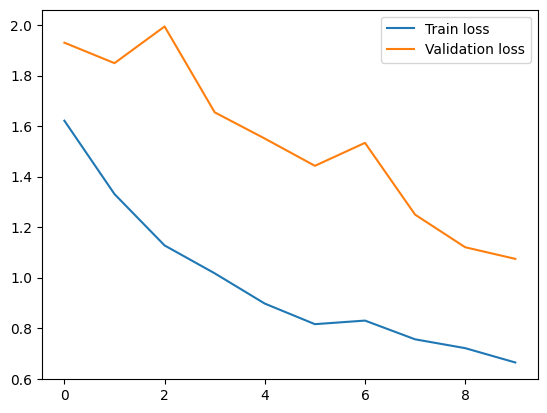

In [23]:
plt.plot(hist.history["loss"], label="Train loss")
plt.plot(hist.history["val_loss"], label="Validation loss")
plt.legend()

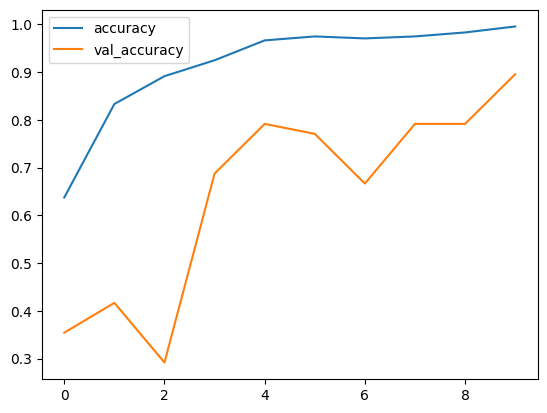

In [24]:
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [25]:
# model.save("fulhaus_model.h5")

(1, 256, 256, 3)


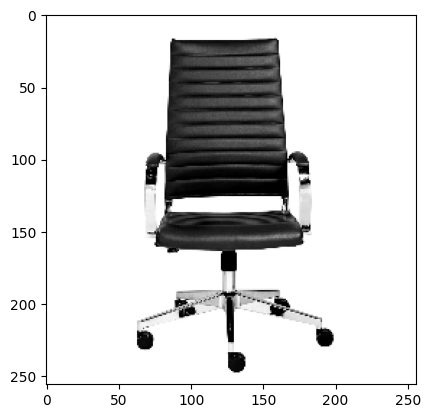

In [49]:
import cv2
import numpy as np
test_image = cv2.imread(f"{test_directory}/Chair/Brooklyn High Back Office Chair.jpg")
resized = cv2.resize(test_image, (256,256))
resized = resized * (1.0 / 255.0)
resized = np.array([resized])
print(resized.shape)
plt.imshow(resized[0])

In [50]:
prediction = model.predict(resized, batch_size=1)

1/1 [==============================] - 0s 102ms/step


: 